<a href="https://colab.research.google.com/github/abhishek-kashyap1997/MachineLearningProjects/blob/main/Hotel_Booking_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The main idea in this project was to find the best classification model for predicting bookings cancellations and finding the best explaining variables for customer cancellations.

**Research Questions:**
  
>Predicting hotel bookings cancellation.

>Which factors can explain customer cancellations?



# Data introduction
The data set given to solve the problem contains booking information for a city hotel and a resort hotel in Portugal for the years 2015–2017. It consists of 119,390 observations (rows) and 32 variables (columns) such as reservation and arrival date, length of stay, canceled or not, the number of adults, children, and babies, number of available parking spaces, total amount of special requests, agent or company which made the reservation, etc.


**Data dictionary:**

> Hotel (H1 = Resort Hotel or H2 = City Hotel)

>is_canceled = Value indicating if the booking was canceled (1) or not (0)

>lead_time = Number of days that between booking and arrival date

>arrival_date = Year of arrival date, month and day

>arrival_date_week_number = Week number of year for arrival date

>stays_in_weekend_nights=Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

>stays_in_week_nights=Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

>adults, childre, babies =Number of adults, childre, babies

>meal = Type of meal booked. Categories are presented in standard hospitality meal packages: 

BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);FB – Full board (breakfast, lunch and dinner);
Undefined/SC – no meal package

>country = Country of origin. Categories are represented in the ISO 3155–3:2013 format

>market_segment = Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

>distribution_channel = Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

>is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)

>previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking

>previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking

>booking_changes = Number of changes/amendments made to the booking from the moment the booking was entered 
on the PMS until the moment of check-in or cancellation

>deposit_type = Indication on if the customer made a deposit to guarantee the booking. 
This variable can assume three categories: No Deposit – no deposit was made;
  
> days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the customer
customer_type

>adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

>required_car_parking_spaces = Number of car parking spaces required by the customer

>total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)

>reservation_status = eservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from svm import svm

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#for pre-processing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#for important feature selection
from sklearn.feature_selection import mutual_info_classif

#for checking goodnees of model
#########   For regression     #########
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error  
#########   For classification    #########     
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve     

#for splitting the data into traing and testing datsets
from sklearn.model_selection import train_test_split

# Fuctions library
 created for fast operations by avoiding the same code writing again

In [ ]:
#For mapping string values to numerical values of a column
def mapping(df,dict,col):
  df[col] = df[col].map(dict)

#checked - Label Encodes the categorical column using LabelEncoder()
def Encoder(df,col):
  le = LabelEncoder()
  # le.fit(list)
  # le.transform(list)
  df[col] = le.fit_transform(df[col])

#Return columns as one vs all 
def OneHotEncoder(df,col):
   return pd.get_dummies(df[col],drop_first=True)

#checked - Detects OutLiers 
def outlierDetection(df,col):
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,3))
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)

# MinMax Scalling
def min_max_scaling(df,x):
  scaler = MinMaxScaler()
  x = scaler.fit_transform(x)

# Standard Scalling
def StandardScaling(df,x):
  sc = StandardScaler()
  dataset = sc.fit_transform(x)
  x = pd.DataFrame(dataset, columns=x.columns)
  x = sc.fit_transform(x)

#checked - Separate categorical and Numerical columns and return them as tuple pair 
def separate_cols(df):
  cat_col = [col for col in df.columns if df[col].dtype == 'O']
  cont_col = [col for col in df.columns if df[col].dtype != 'O']
  return (cat_col,cont_col)

# checked - Change type from object to datetime 
def changeToDatetime(df,col):
  df[col] = pd.to_datetime(df[col])
  # df['Journey_Day'] = df['Date_of_Journey'].dt.day
  # df['Journey_Month']=df['Date_of_Journey'].dt.month

# Extraction can take idias from this example (Extacting hour and min from time)
def extract_Hour_Min(df,h_col=None,min_col=None):
  df[h_col+'_Hour'] = df[h_col].dt.hour
  df[min_col+'_Min'] = df[min_col].dt.minute

#checked - Extraction of year, month, and days from date
def extract_year_month_day(df,col):
  changeToDatetime(df,col)
  df['year'] = df[col].dt.year
  df['month'] = df[col].dt.month
  df['day'] = df[col].dt.day

#checked - Checking co-reation of features vs target feature 
def co_relation(df,target_col):
  return df.corr()[target_col].abs().sort_values(ascending=False)

# Change type of column form object to integer
def change_Col_Type(col):
  if df[col].dtypes == 'O':
    df[col] = df[col].astype(int)

#checked - Drop the column
def drop_col(df,col):
  df.drop(col,axis=1, inplace =True)

In [ ]:
# Important feature selection
def get_imp_feat(x,y):
  imp_feat = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
  imp_feat.columns = ['importance']
  return imp_feat.sort_values(by='importance',ascending=False)

In [ ]:
#checked
#Final Model Calling 
def fit_model(x,y,ml_algo):
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
  model = ml_algo.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)

  return accuracy

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.fillna(0,inplace = True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
lst = ['adults', 'children', 'babies']

In [ ]:
#Unique values contained by 'adults', 'children', 'babies'
for i in lst:
  print('{}:{}'.format(i,df[i].unique()))

adults:[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children:[ 0.  1.  2. 10.  3.]
babies:[ 0  1  2 10  9]


In [ ]:
#Since 'adults', 'children', 'babies' cannot be zero at the same time so this the noise in the data
#df[(df[df['adults']==0) & (df['children']==0) & (df['babies']==0])]
filter = (df['adults']==0) & (df['children']==0) & (df['babies']==0)

In [ ]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
#removing noise
df= df[~filter]

In [ ]:
df.shape

(119210, 32)

# Now Visualise, where do the guests come from ?

In [ ]:
country_wise_data = df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country','No_of_guests']
country_wise_data

,country,No_of_guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,SYC,1
162,ATF,1
163,MRT,1
164,NCL,1


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
basemap = folium.Map()

In [ ]:
import plotly.express as px

In [ ]:
#map of guest
map_of_guest = px.choropleth(
                                country_wise_data,
                               locations = country_wise_data['country'],
                               color = country_wise_data['No_of_guests'],
                               hover_name = country_wise_data['country'],
                               title = 'Home counrrty of guests'
)
map_of_guest.show()

**Insights:**


> Guests come from all over the world but
Most of the guests are from the Portugal and France



# How much do guest pay for a room per night ?

In [ ]:
booking = df[df['is_canceled']==0]

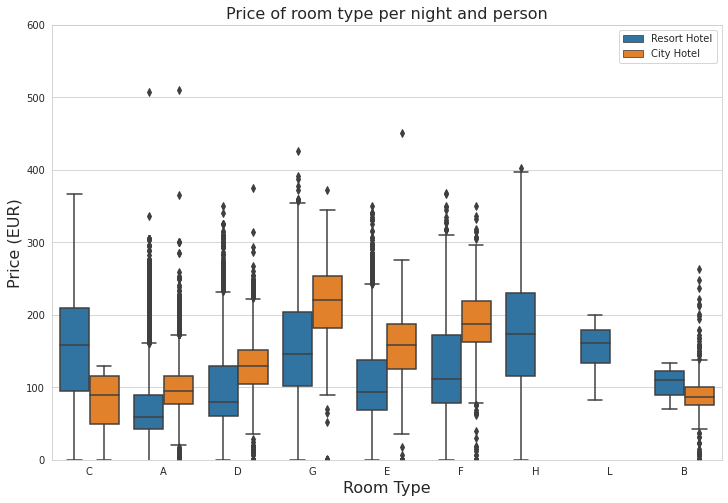

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y = 'adr',
            hue = 'hotel',
            data=booking)
plt.title('Price of room type per night and person',fontsize=16)
plt.xlabel('Room Type',fontsize=16)
plt.ylabel('Price (EUR)', fontsize=16)
plt.legend(loc='upper right')
plt.ylim(0,600)
plt.show()


Room price depends on the type of room, meal type.
This figure shows the average price per room, depending on its type and the standard deviation

# How does the price per night vary over the year ?

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
len(df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)])

46084

In [ ]:
counts_city_resort = df[df['is_canceled']==0]['hotel'].value_counts().reset_index()
counts_city_resort.columns = ['hotel','counts']
counts_city_resort

,hotel,counts
0,City Hotel,46084
1,Resort Hotel,28927


In [ ]:
resort_hotel_booking = df[(df['is_canceled']==0) & (df['hotel']=='Resort Hotel')]
city_hotel_booking = df[(df['is_canceled']==0) & (df['hotel']=='City Hotel')]

#resort_hotel_booking
#city_hotel_booking

In [ ]:
resort_hotel = resort_hotel_booking.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
#Similary for city hotel
city_hotel = city_hotel_booking.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
#merging city hotel and resort hotel into a new dataframe
hotel_adr = resort_hotel.merge(city_hotel,on='arrival_date_month')
hotel_adr.columns = ['month','price for resort','price for city hotel']
hotel_adr

,month,price for resort,price for city hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
#mport sort_dataframeby_monthorweek as sd

In [ ]:
# sorting dataframe according to month 
# final = sd.sort_dataframeby_month(hotel_adr,'month')
# final

In [ ]:
#Months need to be in order use - final from above
px.line(data_frame=hotel_adr,
        x='month',
        y=['price for resort','price for city hotel'],
        title='Room price per night over the months')



**insights:** 
>This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here - since vacation time). The price of the city hotel varies less and is most expensive during spring and autumn.

# Which are the most busiest months

In [ ]:
resort = resort_hotel_booking['arrival_date_month'].value_counts().reset_index()
resort.columns = ['month','guests count']
resort

,month,guests count
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
city = city_hotel_booking['arrival_date_month'].value_counts().reset_index()
city.columns = ['month','guests count']
city

,month,guests count
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
merge_resort_city = resort.merge(city,on='month')
merge_resort_city.columns = ['month','guests count in resort','guests count in city']
merge_resort_city

,month,guests count in resort,guests count in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
#sorting dataFrame according to month
# merge_final = sd.sort_dataframeby_month(merge_resoty_city,'month')
# merge_final

In [ ]:
merge_resort_city.columns

Index(['month', 'guests count in resort', 'guests count in city'], dtype='object')

In [ ]:
merge_resort_city.dtypes

month                     object
guests count in resort     int64
guests count in city       int64
dtype: object

In [ ]:
#Months needs to be in order 
px.line(data_frame=merge_resort_city,
        x='month',
        y=['guests count in resort', 'guests count in city'],
        title='Total no. of guests per month')

**Insights:**


> The City hotel has more guests during spring and autumn, when the prices are also highest.
In July and August there are less visitors, although prices are lower.

>Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
Both hotels have the fewest guests during the winter (This is supported by general trend).


# How long do people stay at hotels ?

In [ ]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
booking['total_nights'] = booking['stays_in_weekend_nights']+booking['stays_in_week_nights']
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [ ]:
stays = booking.groupby(['total_nights','hotel']).agg('count').reset_index()
stays = stays.iloc[:,0:3]
stays.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [ ]:
stays = stays.rename(columns={'is_canceled':'No. of stays'})
stays.head()

,total_nights,hotel,No. of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


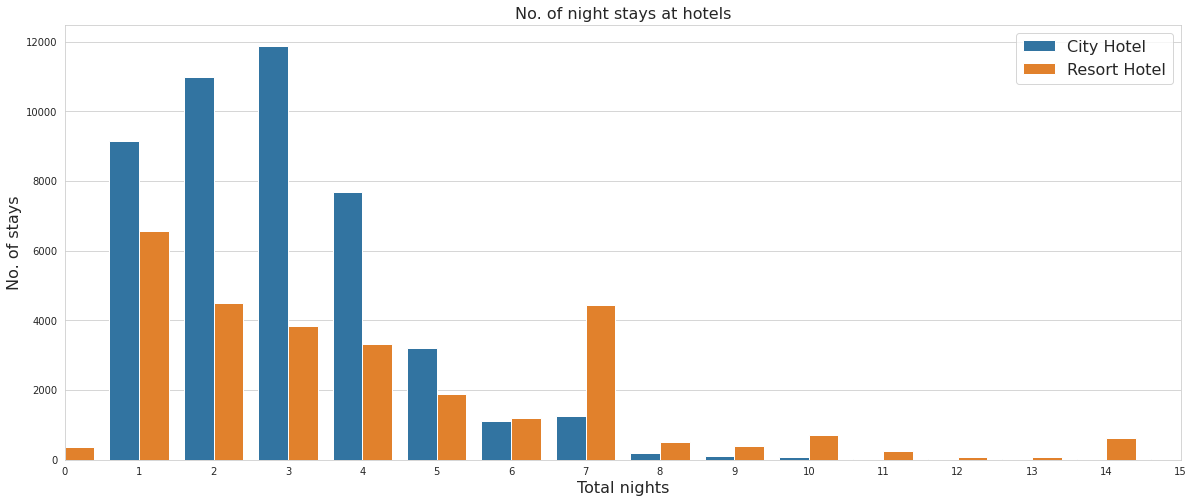

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights',
            y='No. of stays',
            hue='hotel',
            hue_order=['City Hotel','Resort Hotel'],
            data=stays)
plt.xlabel('Total nights',fontsize=16)
plt.ylabel('No. of stays', fontsize=16)
plt.title('No. of night stays at hotels',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.xlim(0,15)
plt.show()

# Select important feature using co-relation

In [ ]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)[1:]
#called co_relation fuction
#co_relation(df,'is_canceled')

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

**Insights:**
>From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.

>However, to predict whether or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.

>I will also not include days_in_waiting_list, booking changes  and arrival_date_year.

>The most important feature to exclude is the "reservation_status":

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#calling separate function to get categorical columns and numerical columns
cat_cols,num_cols = separate_cols(df)
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
#categorical columns should not have 'country', 'reservation_status', 'assigned_room_type'
#And Numerical columns should not have 'arrival_date_year', 'booking_changes', 'days_in_waiting_list'
filter1 = ['country', 'reservation_status', 'assigned_room_type']
cat_df = df[[col for col in cat_cols if col not in filter1]]

In [ ]:
cat_df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'reservation_status_date'],
      dtype='object')

In [ ]:
filter2 = ['arrival_date_year', 'booking_changes']
num_df = df[[col for col in num_cols if col not in filter2]]

In [ ]:
num_df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
#calling function extract_year_month_day
extract_year_month_day(cat_df,'reservation_status_date')

In [ ]:
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [ ]:
#droping reservation_status_date 
cat_df.drop('reservation_status_date', axis=1, inplace=True)

# Perform mean feature encoding

In [ ]:
cat_df['cancellation'] = df['is_canceled']

In [ ]:
for col in cat_df.columns[0:8]:
  print(cat_df.groupby([col])['cancellation'].mean())
  print()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64

meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64

market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64

distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64

reserved_roo

In [ ]:
for col in cat_df.columns[0:8]:
  dict = cat_df.groupby([col])['cancellation'].mean().to_dict()
  cat_df[col] = cat_df[col].map(dict)

In [ ]:
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [ ]:
final_df = pd.concat([cat_df,df[num_cols]],axis=1)
final_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1


In [ ]:
final_df.shape

(119210, 32)

In [ ]:
final_df.shape

(119210, 32)

# Handling outliers

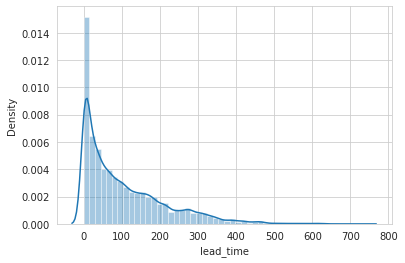

In [ ]:
#looking for outliers 
sns.distplot(final_df['lead_time'])

In [ ]:
#treating the outlier
final_df['lead_time']=np.log1p(final_df['lead_time'])

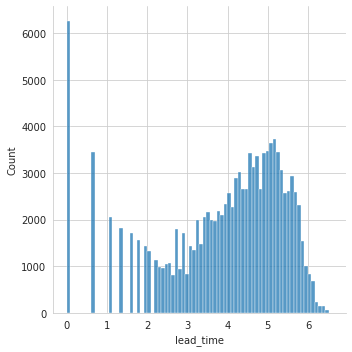

In [ ]:
sns.displot(final_df['lead_time'].dropna())

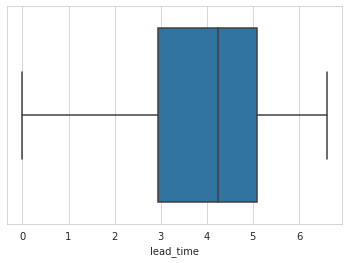

In [ ]:
sns.boxplot(final_df['lead_time'])

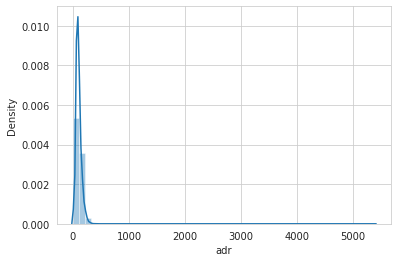

In [ ]:
#similar for adr
sns.distplot(final_df['adr'])

In [ ]:
final_df['adr'] = np.log1p(final_df['adr'])

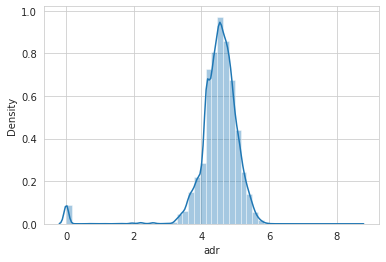

In [ ]:
sns.distplot(final_df['adr'])

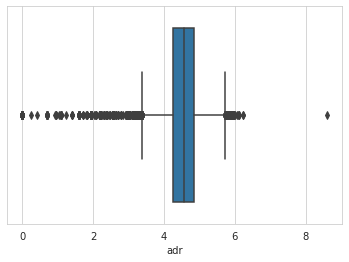

In [ ]:
sns.boxplot(final_df['adr'])

In [ ]:
final_df.isna().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
cancellation                      0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                     

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,5.837730,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.000000,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,6.603944,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.000000,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,2.079442,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,4.330733,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,2.639057,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,4.330733,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,2.708050,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,4.595120,0,1


In [ ]:
final_df.shape

(119209, 32)

# Important feature selection

In [ ]:
#droping columns which are not contributing any value to the data for traning purpose
final_df.drop(['cancellation','agent','arrival_date_year'],axis=1,inplace=True)

In [ ]:
#Separatng vaariables
y=final_df['is_canceled']
x=final_df.drop('is_canceled',axis=1)


In [ ]:
x.shape

(119209, 28)

In [ ]:
x.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

select_feature = SelectFromModel(Lasso(alpha=0.005,random_state=0))
select_feature.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
select_feature.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
cols = x.columns

In [ ]:
x = x[cols[(select_feature.get_support())]]

In [ ]:
x.shape

(119209, 15)

In [ ]:
x.columns

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

# data split and model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[18385,  4064],
       [ 6323,  6991]])

In [ ]:
score = accuracy_score(y_test,y_pred)
score

0.7095601599418393

In [ ]:
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [ ]:
#Caling function fit_model for accuracy score which defined in the fuction librabry 
fit_model(x,y,rf)

0.9540307021223052

In [ ]:
fit_model(x,y,xgb)

0.8780024047199619

In [ ]:
#Highest accuracy is obtained by the Random Foorest and hence is the winning model

Cross validating the model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
sc = cross_val_score(rf,x,y,cv=10)
sc

array([0.8458183 , 0.84296619, 0.82274977, 0.7922993 , 0.77669659,
       0.71655062, 0.74700109, 0.63560104, 0.70690378, 0.81879195])

In [ ]:
sc.mean()

0.7705378642055727

Dumping the model

In [ ]:
import joblib
joblib.dump(rf,'Hotel_booking_cancellation.obj')

['Hotel_booking_cancellation.obj']

Thank You for vising :D